In [149]:
!pip install nlp
!pip install datasets

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nlp
import tensorflow as tf
import random
import os
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
def show_history(h):
    # Функция для отображения графиков точности и потерь
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(9, 9))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Обучение')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Валидация')
    plt.ylim([0., 1.])
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    # График потерь
    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Обучение')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Валидация')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()
    plt.show()

In [151]:
def show_confusion_matrix(y_true, y_pred, classes):
    # Функция для отображения матрицы ошибок
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(9, 9))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

In [152]:
def create_model_checkpoint(model_name, save_path="./model_checkpoints"):
    # Функция для создания контрольной точки модели
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_loss",
                                              verbose=0,
                                              save_best_only=True)


In [153]:
from datasets import load_dataset

# Загрузка набора данных
data = load_dataset("dair-ai/emotion")


  0%|          | 0/3 [00:00<?, ?it/s]

In [154]:

# Получение списка уникальных эмоций
unique_emotions = data['train'].features['label'].names

# Создание словаря, где каждой эмоции соответствует цифра
emotion_to_index = {emotion: index for index, emotion in enumerate(unique_emotions)}

# Вывод словаря на экран
print(emotion_to_index)


{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}


In [155]:
# Получение данных о твитах и эмоциях
tweets, emotions = get_tweet_data(train)

# Вывод первых 10 твитов и соответствующих эмоций
print(tweets[:10])
print(emotions[:10])

# Преобразование текстовых твитов в последовательности чисел
sequences = tokenizer.texts_to_sequences([tweets[0]])

# Выравнивание последовательностей по максимальной длине
length = [len(t.split(' ')) for t in tweets]
print(length[:10])


['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too']
[0, 0, 3, 2, 3, 0, 5, 4, 1, 2]
[4, 21, 10, 18, 4, 12, 23, 17, 19, 4]


In [156]:
# Вычисление средней длины твитов
def get_average(data):
    count = 0
    d_len = 0
    for d in data:
        d_len = d_len + len(d.split(' '))
        count = count + 1
    avg = d_len / count
    return avg

average_length = get_average(tweets)
print(average_length)

19.1663125


[[   2  139    3  679    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   2   40  101   60    8   15  494    5   15 3496  553   32   60   61
   128  148   76 1480    4   22 1255    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  17 3060    7 1149    5  286    2    3  495  438    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   2   24  165    8  665   27    6 4158    2   59   47    9   13   22
    72   30    6 3497    0    0    0    0    0    0    0    0    0    0
     0    0    0   

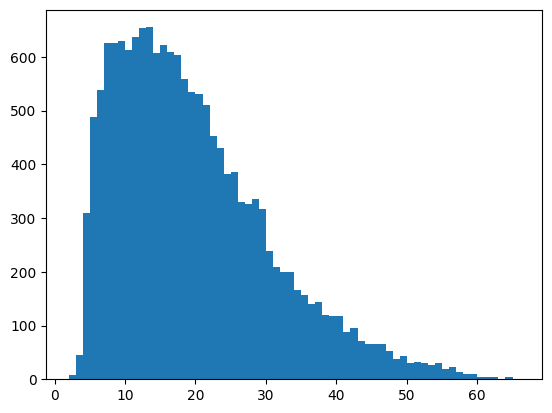

In [157]:
# Визуализация длины твитов с помощью гистограммы
plt.hist(length, bins=len(set(length)))

# Преобразование текстовых данных в последовательности чисел и выравнивание по максимальной длине
def make_sequences(tokenizer, data):
    sequences = tokenizer.texts_to_sequences(data)
    padded_sequences = pad_sequences(sequences, truncating='post', padding='post', maxlen=max_len)
    return padded_sequences

padded_train_sequences = make_sequences(tokenizer, tweets)
print(padded_train_sequences[:9])

{0, 1, 2, 3, 4, 5}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


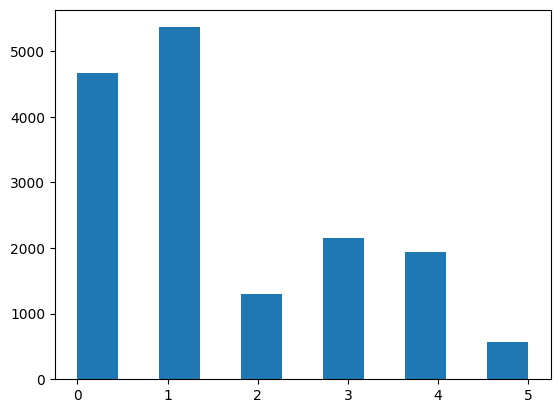

In [158]:
# Преобразование эмоций в числовой формат
classes = set(emotions)
print(classes)

# Визуализация количества твитов для каждой эмоции с помощью гистограммы
plt.hist(emotions, bins=11)

# Создание словарей для преобразования эмоций в числовой формат и наоборот
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in classes_to_index.items())
print(classes_to_index)
print(index_to_class)

In [159]:
# Функция для преобразования эмоций в числовой формат
names_to_ids = lambda emotions: np.array([classes_to_index.get(x) for x in emotions])

train_labels = names_to_ids(emotions)


In [160]:
# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=54),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
], name="model_1_Bidirectional_RNN")

In [161]:
# Вычисление весов классов
class_counts = np.bincount(train_labels)  # подсчет количества образцов в каждом классе
total_samples = np.sum(class_counts)  # общее количество образцов

class_weights = total_samples / (len(class_counts) * class_counts)  # вычисление весов классов

class_weights = dict(enumerate(class_weights))

In [162]:
# Компиляция модели с использованием взвешенных классов
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "model_1_Bidirectional_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 54, 16)            160000    
                                                                 
 bidirectional_22 (Bidirecti  (None, 54, 40)           5920      
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 40)               9760      
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [163]:
val_tweets, val_emotions = get_tweet_data(val)
val_sequences = make_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_emotions)

In [164]:
# Проверка твитов, их последовательностей и эмоций
print("Твит:", val_tweets[0])
print("Последовательность:", val_sequences[0])
print("Эмоция:", val_labels[0])

Твит: im feeling quite sad and sorry for myself but ill snap out of it soon
Последовательность: [ 17   8 157 260   4 343  16  51  19 212   1  50  10  13 533   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Эмоция: 0


In [165]:
# Обучение модели
m1 = model.fit(padded_train_seq, train_labels, epochs=20, validation_data=(val_sequences, val_labels),
               callbacks=[create_model_checkpoint(model_name=model.name)])


Epoch 1/20
500/500 [==============================] - ETA: 0s - loss: 1.3540 - accuracy: 0.4783

500/500 [==============================] - 141s 263ms/step - loss: 1.3540 - accuracy: 0.4783 - val_loss: 0.9144 - val_accuracy: 0.6840
Epoch 2/20
500/500 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.7843

500/500 [==============================] - 79s 158ms/step - loss: 0.6316 - accuracy: 0.7843 - val_loss: 0.5415 - val_accuracy: 0.8125
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.8852

500/500 [==============================] - 68s 136ms/step - loss: 0.3576 - accuracy: 0.8852 - val_loss: 0.4410 - val_accuracy: 0.8605
Epoch 4/20
500/500 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.9323

500/500 [==============================] - 72s 144ms/step - loss: 0.2223 - accuracy: 0.9323 - val_loss: 0.3834 - val_accuracy: 0.8825
Epoch 5/20
500/500 [==============================] - 36s 71ms/step - loss: 0.1638 - accuracy: 0.9502 - val_loss: 0.3852 - val_accuracy: 0.8820
Epoch 6/20
500/500 [==============================] - 35s 71ms/step - loss: 0.1201 - accuracy: 0.9611 - val_loss: 0.3935 - val_accuracy: 0.8890
Epoch 7/20
500/500 [==============================] - 40s 80ms/step - loss: 0.0956 - accuracy: 0.9701 - val_loss: 0.4052 - val_accuracy: 0.8905
Epoch 8/20
500/500 [==============================] - 36s 73ms/step - loss: 0.0817 - accuracy: 0.9732 - val_loss: 0.4171 - val_accuracy: 0.8810
Epoch 9/20
500/500 [==============================] - 40s 80ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.4160 - val_accuracy: 0.8845
Epoch 10/20
500/500 [==============================] - 36s 72ms/step - loss: 0.0583 - accuracy: 0.9812 - val_loss: 0.4406 - val_accuracy: 0.8870
E

In [189]:
import pickle

with open('m1.pkl', 'wb') as f:
    pickle.dump(m1.history, f)

In [188]:
# Создание графика значений потерь
fig1 = px.line(m1.history, y=['loss', 'val_loss'], labels={'index': 'эпоха', 'value': 'значение потерь'})
fig1.update_layout(
    title="График значений потерь",
    xaxis_title="эпоха",
    yaxis_title="значение потерь",
    legend_title="Тип",
)

fig2 = px.line(m1.history, y=['accuracy', 'val_accuracy'], labels={'index': 'эпоха', 'value': 'точность'})
fig2.update_layout(
    title="График точности",
    xaxis_title="эпоха",
    yaxis_title="точность",
    legend_title="Тип",
)

# Отображение графиков
fig1.show()
fig2.show()

In [175]:
test_tweets, test_emotions = get_tweet_data(test)
test_sequences = make_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_emotions)

m1_r = model.evaluate(x=test_sequences, y=test_labels)

n = random.randint(0, len(test_labels) - 1)

63/63 [==============================] - 1s 18ms/step - loss: 0.5506 - accuracy: 0.8750


In [176]:
# Вывод фактического текста твита и связанной с ним эмоции
print(test_tweets[n])
print('Emotion', index_to_class[test_labels[n]])
prediction = model.predict(np.expand_dims(test_sequences[n], axis=0))[0]
prediction_emotion = index_to_class[np.argmax(prediction).astype('uint8')]
prediction_emotion

i spend a lot of time feeling disappointed with myself for not doing a better job at attaining my goals
Emotion 0
1/1 [==============================] - 0s 38ms/step


0

In [177]:
# Функция для вычисления метрик
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [178]:
# Получение предсказаний модели
y_pred = np.argmax(model.predict(test_sequences), axis=1)

# Вычисление метрик
accuracy, precision, recall, f1 = calculate_metrics(test_labels, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

63/63 [==============================] - 1s 19ms/step
Accuracy: 0.875
Precision: 0.8817054225715945
Recall: 0.875
F1-score: 0.8771985074636196


In [179]:
# Получение списка уникальных эмоций
unique_emotions = data['train'].features['label'].names

# Создание словаря, где каждой эмоции соответствует цифра
emotion_to_index = {emotion: index for index, emotion in enumerate(unique_emotions)}

# Вывод словаря на экран
print(emotion_to_index)

sentence = "Oh you are so beautiful fuck fuck"

sentence_tokens = tokenizer.texts_to_sequences([sentence])
padded_sentence = pad_sequences(sentence_tokens, truncating='post', padding='post', maxlen=max_len)

prediction = model.predict(padded_sentence)
predicted_emotion = index_to_class[np.argmax(prediction)]

print("Предсказанная эмоция:", predicted_emotion)

{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}
1/1 [==============================] - 0s 37ms/step
Предсказанная эмоция: 0


In [180]:
# Получение случайных индексов для десяти предложений
random_indices = random.sample(range(len(test_tweets)), 10)

for index in random_indices:
    # Получение предложения, его последовательности и метки
    tweet = test_tweets[index]
    sequence = test_sequences[index]
    label = test_labels[index]

    # Предсказание эмоции для предложения
    prediction = model.predict(np.expand_dims(sequence, axis=0))[0]
    predicted_emotion = index_to_class[np.argmax(prediction).astype('uint8')]

    # Вывод предложения, его метки и предсказанной эмоции
    print("Предложение:", tweet)
    print("Метка:", index_to_class[label])
    print("Предсказанная эмоция:", predicted_emotion)
    print("-------------------------")


1/1 [==============================] - 0s 37ms/step
Предложение: i feel inside cause life is like a game sometimes but then you came around me the walls just disappeared nothing to surround me and keep me from my fears im unprotected see how ive opened up youve made me trust
Метка: 4
Предсказанная эмоция: 0
-------------------------
1/1 [==============================] - 0s 38ms/step
Предложение: i feel inside coz i m so fucking horny
Метка: 2
Предсказанная эмоция: 2
-------------------------
1/1 [==============================] - 0s 32ms/step
Предложение: i feel like a boring blogger lately
Метка: 0
Предсказанная эмоция: 0
-------------------------
1/1 [==============================] - 0s 35ms/step
Предложение: i feel that books are always a wonderful gift for a baby
Метка: 1
Предсказанная эмоция: 1
-------------------------
1/1 [==============================] - 0s 42ms/step
Предложение: i do know that i tell some people if i feel that their question is sincere some of my sacred tre

In [181]:
# Сохранение токенизатора
tokenizer_path = os.path.join("model_checkpoints", "tokenizer.joblib")
joblib.dump(tokenizer, tokenizer_path)

# Сохранение словарей эмоций
emotion_to_index_path = os.path.join("model_checkpoints", "emotion_to_index.joblib")
index_to_class_path = os.path.join("model_checkpoints", "index_to_class.joblib")
joblib.dump(emotion_to_index, emotion_to_index_path)
joblib.dump(index_to_class, index_to_class_path)

# Сохранение модели
model_path = os.path.join("model_checkpoints", "model_1_Bidirectional_RNN.h5")
model.save(model_path)

# Сохранение параметров модели
params = {
    "max_len": max_len,
    "classes_to_index": classes_to_index,
    "index_to_class": index_to_class
}
params_path = os.path.join("model_checkpoints", "model_params.joblib")
joblib.dump(params, params_path)

['model_checkpoints/model_params.joblib']